In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']


df = pd.read_csv('./movies.csv',
                   sep='|',
                   header=None,
                   names=column_names,
                   na_values='?',
                   thousands=',',
                   )
df.head()

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,237000000.0,2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,300000000.0,2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,245000000.0,2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,250000000.0,2012.0,8.5,Action
4,NaN,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,7.1,Documentary


#### Faça a leitura do arquivo `movies.csv`

column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

1. Qual o filme com o maior lucro?
2. Qual o filme que deu o maior prejuízo
3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
4. Uma plotagem do genero do filme.
5. Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
6. Qual o Genero mais popular e menos popular?
7. Existe relação entre os melhores filme e seu Budget?
8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
9. Mostre num gráfico a quantidade de filmes ao passar do ano

# Exercicio 1 - Filme com maior lucro

In [3]:
df['lucro'] = df['gross'] - df['budget']
df.loc[df['lucro'].idxmax()]


color                             Color
director_name             James Cameron
num_critic_for_reviews            723.0
duration                          178.0
gross                       760505847.0
movie_title                     Avatar 
num_user_for_reviews             3054.0
country                             USA
cotent_rating                     PG-13
budget                      237000000.0
title_year                       2009.0
imdb_score                          7.9
genre                            Action
lucro                       523505847.0
Name: 0, dtype: object

# Exercicio 2 - Filme com maior prejuízo

In [4]:
df.loc[df['lucro'].idxmin()]

color                              Color
director_name             Andrew Stanton
num_critic_for_reviews             462.0
duration                           132.0
gross                         73058679.0
movie_title                 John Carter 
num_user_for_reviews               738.0
country                              USA
cotent_rating                      PG-13
budget                       263700000.0
title_year                        2012.0
imdb_score                           6.6
genre                             Action
lucro                       -190641321.0
Name: 5, dtype: object

# Exercicio 3 - Plotagem Budget / Ano

<Axes: title={'center': 'Budget por ano em Bilhões'}, xlabel='Ano', ylabel='Budget'>

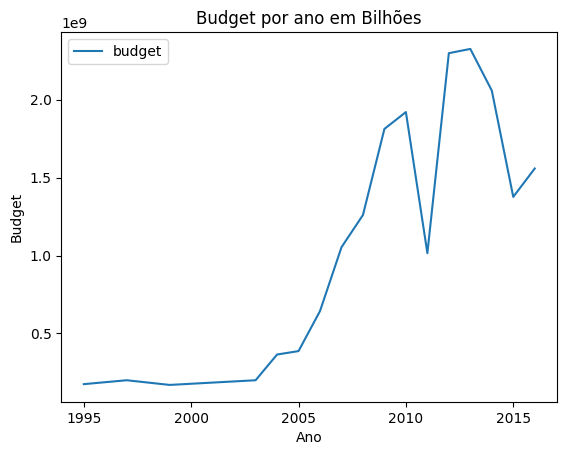

In [53]:
df.groupby('title_year').agg({'budget':'sum'}).plot(title='Budget por ano em Bilhões', xlabel='Ano', ylabel='Budget')

# Exercício 4 - Filmes / Gênero

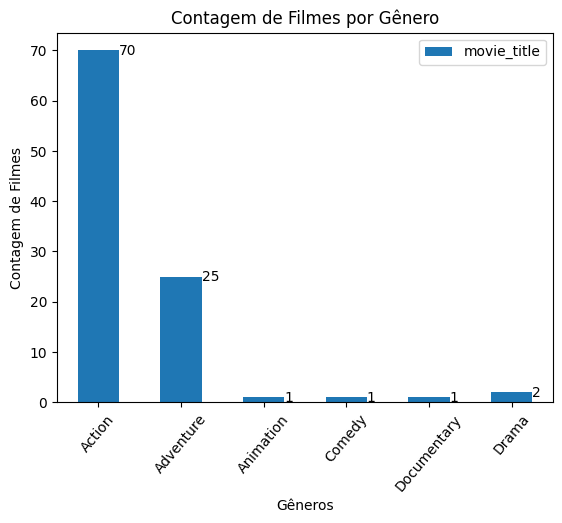

In [107]:
filmes_genero = df.groupby('genre').agg({'movie_title':'count'})

grafico = filmes_genero.plot(kind='bar', rot=50, title='Contagem de Filmes por Gênero', xlabel='Gêneros', ylabel='Contagem de Filmes', legend='Gênero')

for p in grafico.patches:
    grafico.annotate(str(p.get_height()), (p.get_x() + 0.5 , p.get_height() - 0.9))   

# Exercício 5 - Top 10 Filmes

In [123]:
df.sort_values('imdb_score', ascending=False)[:10]

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,lucro
66,Color,Christopher Nolan,645.0,152.0,533316061.0,The Dark Knight,4667.0,USA,PG-13,185000000.0,2008.0,9.0,Action,348316061.0
97,Color,Christopher Nolan,642.0,148.0,292568851.0,Inception,2803.0,USA,PG-13,160000000.0,2010.0,8.8,Action,132568851.0
96,Color,Christopher Nolan,712.0,169.0,187991439.0,Interstellar,2725.0,USA,PG-13,165000000.0,2014.0,8.6,Adventure,22991439.0
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,250000000.0,2012.0,8.5,Action,198130642.0
58,Color,Andrew Stanton,421.0,98.0,223806889.0,WALL·E,1043.0,USA,G,180000000.0,2008.0,8.4,Adventure,43806889.0
78,Color,Pete Docter,536.0,95.0,356454367.0,Inside Out,773.0,USA,PG,175000000.0,2015.0,8.3,Adventure,181454367.0
67,Color,Pete Docter,408.0,96.0,292979556.0,Up,704.0,USA,PG,175000000.0,2009.0,8.3,Adventure,117979556.0
43,Color,Lee Unkrich,453.0,103.0,414984497.0,Toy Story 3,733.0,USA,G,200000000.0,2010.0,8.3,Adventure,214984497.0
27,Color,Anthony Russo,516.0,147.0,407197282.0,Captain America: Civil War,1022.0,USA,PG-13,250000000.0,2016.0,8.2,Action,157197282.0
93,Color,Dean DeBlois,288.0,98.0,217387997.0,How to Train Your Dragon,492.0,USA,PG,165000000.0,2010.0,8.2,Adventure,52387997.0


# Exercício 6 - Popularidade dos Gêneros por IMDBScore

In [150]:
df_temp = df.groupby('genre').agg({'imdb_score':'mean'}).reset_index()
maior, menor = df_temp.loc[df_temp['imdb_score'].idxmax()], df_temp.loc[df_temp['imdb_score'].idxmin()]
print(f'''Os gêneros com maiores e menores popularidades baseadas na média da pontuação IMDB são:
      Maior Pontuação: {maior['genre']} - {maior['imdb_score']} pts
      Menor Pontuação: {menor['genre']} - {menor['imdb_score']} pts''')

Os gêneros com maiores e menores popularidades baseadas na média da pontuação IMDB são:
      Maior Pontuação: Drama - 7.5 pts
      Menor Pontuação: Comedy - 5.4 pts
